In [1]:
#ドライブマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
#from keras.utils import np_utils

In [5]:
#もとになるモデルをインポート
from keras.models import Model
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.callbacks import CSVLogger
from keras import optimizers

n_categories=151
batch_size=32
train_dir='/content/drive/MyDrive/1gen_train'
validation_dir='/content/drive/MyDrive/1gen_validation'
model_name='cnn_pokemon_fine'
labels=[i for i in range(1,152)]



# モデルの宣言
model = Sequential()
model.add(Dense(32, input_shape=(224, 224, 3)))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(151, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 224, 224, 32)      128       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 flatten_1 (Flatten)         (None, 394272)            0         
                                                                 
 dense_3 (Dense)             (None, 512)               201867776 
                                                      

In [6]:
#ファインチューニングを実行

n_categories=151
batch_size=32
train_dir='/content/drive/MyDrive/1gen_train'
validation_dir='/content/drive/MyDrive/1gen_validation'
file_name='vgg16_pokemon_fine'
classes=[str(i) for i in range(1,152)]

train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=batch_size,
    classes=classes,
    class_mode='categorical',
    shuffle=True
)
#test_datagen.flow_from_directory(directory=validation_dir,target_size=(img_rows, img_cols),color_mode='rgb',classes=classes,class_mode='categorical',batch_size=batch_size_for_data_generator,shuffle=True)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=batch_size,
    classes=classes,
    class_mode='categorical',
    shuffle=True
)

hist=model.fit_generator(train_generator,steps_per_epoch=25,epochs=50,validation_data=validation_generator,validation_steps=10,verbose=1)

#save weights
model.save('/content/drive/MyDrive/'+file_name+'.h5')

Found 2995 images belonging to 151 classes.
Found 1499 images belonging to 151 classes.


<ipython-input-6-ceb237446789>:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_generator,steps_per_epoch=25,epochs=50,validation_data=validation_generator,validation_steps=10,verbose=1)


Epoch 1/50
25/25 [==============================] - 267s 11s/step - loss: 9.2758 - acc: 0.0200 - val_loss: 4.7936 - val_acc: 0.0437
Epoch 2/50
25/25 [==============================] - 184s 7s/step - loss: 4.5024 - acc: 0.1013 - val_loss: 4.1321 - val_acc: 0.1219
Epoch 3/50
25/25 [==============================] - 136s 6s/step - loss: 3.7998 - acc: 0.1825 - val_loss: 3.1644 - val_acc: 0.3281
Epoch 4/50
25/25 [==============================] - 94s 4s/step - loss: 2.7535 - acc: 0.3825 - val_loss: 1.6137 - val_acc: 0.6719
Epoch 5/50
25/25 [==============================] - 79s 3s/step - loss: 1.8240 - acc: 0.5913 - val_loss: 1.1360 - val_acc: 0.7312
Epoch 6/50
25/25 [==============================] - 62s 3s/step - loss: 1.1468 - acc: 0.7337 - val_loss: 0.3943 - val_acc: 0.9031
Epoch 7/50
25/25 [==============================] - 47s 2s/step - loss: 0.5673 - acc: 0.8675 - val_loss: 0.2007 - val_acc: 0.9656
Epoch 8/50
25/25 [==============================] - 46s 2s/step - loss: 0.4305 - acc: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
#モデルを評価

from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os,random

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

batch_size=32
file_name='/content/drive/MyDrive/vgg16_pokemon_fine'
test_dir='/content/drive/MyDrive/1gen_validation'
display_dir=test_dir
#label=['husigidane','zenigame','hitokage']

#load model and weights
#json_string=open(file_name+'.json').read()
#model=model_from_json(json_string)
model=load_model('/content/drive/MyDrive/vgg16_pokemon_fine.h5')


model.compile(optimizer=SGD(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#data generate
test_datagen=ImageDataGenerator(rescale=1.0/255)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

#evaluate model
score=model.evaluate_generator(test_generator)
print('\n test loss:',score[0])
print('\n test_acc:',score[1])

Found 1499 images belonging to 151 classes.


<ipython-input-21-aa40492a9880>:39: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score=model.evaluate_generator(test_generator)



 test loss: 52.02417755126953

 test_acc: 0.006671113893389702


pred: 27
score: 1.0
ans: 27


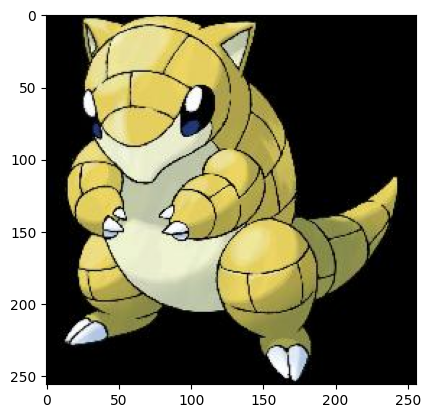

In [11]:
#画像を入力してそれが何の画像か判定する
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import random

from tensorflow.keras.utils import img_to_array,load_img
#from keras.preprocessing.image import load_img, save_img, img_to_array, array_to_img
#↑これは非対応になった




#画像の読込
model=load_model('/content/drive/MyDrive/vgg16_pokemon_fine.h5')

for dex_num in range(1,152):
  img_path='/content/drive/MyDrive/1gen_validation/'+str(dex_num)+'/*.jpg'
  one_img=glob.glob(img_path)[0]

  img = img_to_array(load_img(one_img, target_size=(224,224)))
  #0-1に変換
  img_nad = img_to_array(img)/255
    #4次元配列に
  img_nad = img_nad[None, ...]


  #表示したいクラス名（任意設定）
  label=[i for i in range(1,151)]
  #判別
  pred = model.predict(img_nad, batch_size=1, verbose=0)
  #判別結果で最も高い数値を抜き出し
  score = np.max(pred)
    #判別結果の配列から最も高いところを抜きだし、そのクラス名をpred_labelへ
  pred_label = label[np.argmax(pred[0])]
    #表示
  img = mpimg.imread(one_img)
  imgplot = plt.imshow(img)
  print('pred:',pred_label)
  print('score:',score)
  print('ans:',dex_num)


In [19]:
import pandas as pd

model=load_model('/content/drive/MyDrive/vgg16_pokemon_fine.h5')
acc_list=[]
for dex_num in range(1,152):
  correct=0
  count=0
  for img_num in range(5):
    img_path='/content/drive/MyDrive/1gen_validation/'+str(dex_num)+'/*.jpg'

    try:
      one_img=glob.glob(img_path)[img_num]
    except:
      continue

    img = img_to_array(load_img(one_img, target_size=(224,224)))
    #0-1に変換
    img_nad = img_to_array(img)/255
      #4次元配列に
    img_nad = img_nad[None, ...]


    #表示したいクラス名（任意設定）
    label=[i for i in range(1,152)]
    #判別
    pred = model.predict(img_nad, batch_size=1, verbose=0)
    #判別結果で最も高い数値を抜き出し
    score = np.max(pred)
      #判別結果の配列から最も高いところを抜きだし、そのクラス名をpred_labelへ
    pred_label = label[np.argmax(pred[0])]
    count+=1
    if pred_label==dex_num:
      correct+=1
  try:
    acc_list.append(correct/count)
  except:
    acc_list.append('No img')

df=pd.DataFrame({'dex_num':[x for x in range(1,152)],'acc':acc_list})
df

,dex_num,acc
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
146,147,1.0
147,148,1.0
148,149,1.0
149,150,1.0


In [20]:
df.to_csv('pokedex_result.csv')

In [32]:
one_img='/content/ピカチュウ２.jpg'
img = img_to_array(load_img(one_img, target_size=(224,224)))
  #0-1に変換
img_nad = img_to_array(img)/255
      #4次元配列に
img_nad = img_nad[None, ...]


    #表示したいクラス名（任意設定）
label=[i for i in range(1,152)]
    #判別
pred = model.predict(img_nad, batch_size=1, verbose=0)
    #判別結果で最も高い数値を抜き出し
score = np.max(pred)
      #判別結果の配列から最も高いところを抜きだし、そのクラス名をpred_labelへ
pred_label = label[np.argmax(pred[0])]
print(pred_label)
print(score)

14
0.999959
